# Different ways to compute OLS

Import all necessary modules

In [1]:
import numpy as np
from numpy.linalg import inv, lstsq
import matplotlib.pylab as plt

If you want to embed plots inside IPython notebook, you need to turn on this option.

In [2]:
%matplotlib inline

### Generate the data

Define the number of observations in the sample, $N$, and the number of simulations, $S$.

In [3]:
N, S = 100, 1000

Parameters of the joint distribution of $X$ and $e$.

In [4]:
mean = [0,0]
rho = .1
cov = [[1, rho], [rho, 1]]

Regression level and slope.

In [5]:
alpha, beta = 2, 3

Simulate $X$ and $e$ from multivariate normal distribution.

In [6]:
X, e = np.random.multivariate_normal(mean, cov, (N,S)).T
Y = alpha + beta * X + e

### OLS Estimator

Define two functions which should return the same slope parameter. The difference is in the implementation. The first one is a bit more natural since it uses NumPy matrices. This allows to use `*` symbol to multiply matrices. the second uses NumPy arrays instead. This implementation requires the use of `dot` function.

In [7]:
def ols_matrix(Y,X):
    Y = np.matrix(Y).T
    X = np.matrix(np.vstack((np.ones_like(X), X))).T
    beta = np.array(inv(X.T * X) * (X.T * Y))
    return float(beta[1])

def ols_array(Y,X):
    X = np.vstack((np.ones_like(X), X)).T
    Qxx = np.dot(X.T, X)
    Qxy = np.dot(X.T, Y)
    beta = np.dot(inv(Qxx), Qxy)
    return float(beta[1])

def ols_lstsq(Y,X):
    X = np.vstack((np.ones_like(X), X)).T
    beta = lstsq(X,Y)[0]
    return float(beta[1])

### Compute the estimates

Now we need to initialize two containers for our estimates in each simulated sample.

In [8]:
beta_hat1, beta_hat2, beta_hat3 = [], [], []

For each simulated sample we compute the estimate and append it to the list. IPython "magic" `%%timeit` will show how much time was spent in the current block.

In [9]:
%%time
for y, x in zip(Y, X):
    beta_hat1.append(ols_matrix(y, x))

CPU times: user 380 ms, sys: 12 ms, total: 392 ms
Wall time: 207 ms


Same for the second implimentation through arrays instead of matrices.

In [10]:
%%time
for y, x in zip(Y, X):
    beta_hat2.append(ols_array(y, x))

CPU times: user 172 ms, sys: 0 ns, total: 172 ms
Wall time: 118 ms


In [11]:
%%time
for y, x in zip(Y, X):
    beta_hat3.append(ols_lstsq(y, x))

CPU times: user 428 ms, sys: 20 ms, total: 448 ms
Wall time: 230 ms


### Analyze the results

Are the results equal?

In [12]:
print(np.array_equal(beta_hat1, beta_hat2))
print(np.array_equal(beta_hat1, beta_hat3))
print(np.allclose(beta_hat1, beta_hat3, atol = 1e-20))

True
False
True


Plot the histogram.

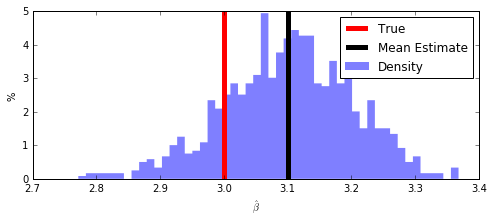

In [13]:
plt.figure(figsize = (8,3))
plt.hist(beta_hat1, 50, histtype = 'stepfilled', normed = True, lw = 0, alpha = .5, label = 'Density')
plt.axvline(beta, color = 'red', lw = 5, label = 'True')
plt.axvline(np.mean(beta_hat1), color = 'black', lw = 5, label = 'Mean Estimate')
plt.xlabel(r'$\hat{\beta}$')
plt.ylabel('%')
plt.legend()
plt.show()